R²: 0.923
Fraction of variance explained: 92.30%


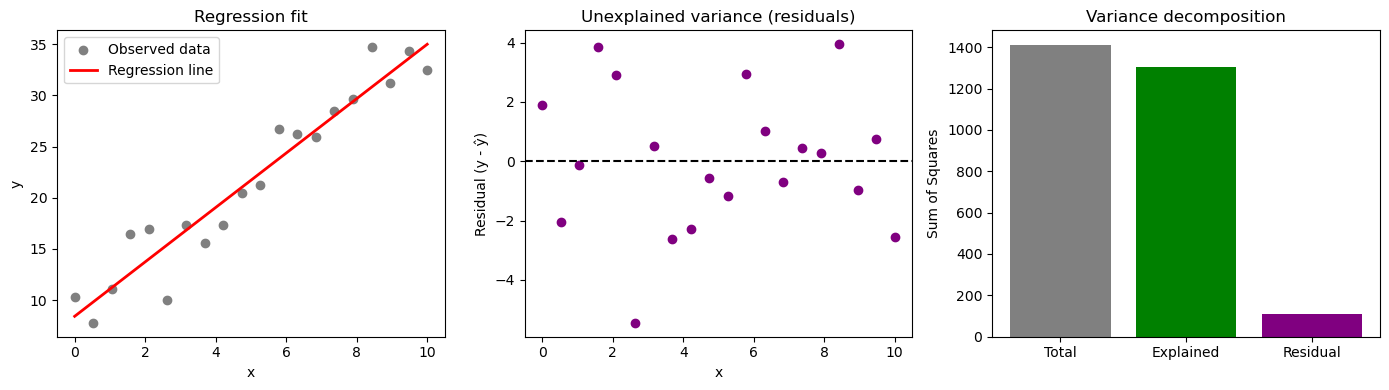

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(0)
x = np.linspace(0, 10, 20).reshape(-1, 1)
y_true = 3 * x.squeeze() + 5
y = y_true + np.random.normal(scale=3, size=len(x))  # add noise

# Fit a simple linear regression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Compute variances
TSS = np.sum((y - np.mean(y))**2)
RSS = np.sum((y - y_pred)**2)
explained_var = TSS - RSS
R2 = 1 - RSS / TSS

print(f"R²: {R2:.3f}")
print(f"Fraction of variance explained: {explained_var / TSS:.2%}")

# ============================
# 1. Plot regression fit
# ============================
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.scatter(x, y, label='Observed data', color='gray')
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression fit")
plt.legend()

# ============================
# 2. Plot residuals (errors)
# ============================
plt.subplot(1, 3, 2)
plt.scatter(x, y - y_pred, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("x")
plt.ylabel("Residual (y - ŷ)")
plt.title("Unexplained variance (residuals)")

# ============================
# 3. Bar plot of variances
# ============================
plt.subplot(1, 3, 3)
plt.bar(["Total", "Explained", "Residual"],
        [TSS, explained_var, RSS],
        color=["gray", "green", "purple"])
plt.title("Variance decomposition")
plt.ylabel("Sum of Squares")
plt.tight_layout()
plt.show()